In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Tasa_desempleo_API.csv')

Necesitamos que la fecha tenga formato Año-Mes

Primero cambiamos los meses por su numero correspondiente

In [5]:
df['Mes'] = df['Mes'].str.replace('Enero', '01')
df['Mes'] = df['Mes'].str.replace('Febrero', '02')
df['Mes'] = df['Mes'].str.replace('Marzo', '03')
df['Mes'] = df['Mes'].str.replace('Abril', '04')
df['Mes'] = df['Mes'].str.replace('Mayo', '05')
df['Mes'] = df['Mes'].str.replace('Junio', '06')
df['Mes'] = df['Mes'].str.replace('Julio', '07')
df['Mes'] = df['Mes'].str.replace('Agosto', '08')
df['Mes'] = df['Mes'].str.replace('Septiembre', '09')
df['Mes'] = df['Mes'].str.replace('Octubre', '10')
df['Mes'] = df['Mes'].str.replace('Noviembre', '11')
df['Mes'] = df['Mes'].str.replace('Diciembre', '12')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado             6000 non-null   object 
 1   Año                6000 non-null   int64  
 2   Mes                6000 non-null   object 
 3   Tasa de desempleo  6000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 187.6+ KB


Cambiamos el tipo de dato

In [7]:
df['Año'] = df['Año'].astype('string')

In [8]:
df['Año'] = df['Año'].astype('object')

Unimos las dos columnas

In [9]:
df['Fecha'] = df.Año + '-' +  df.Mes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado             6000 non-null   object 
 1   Año                6000 non-null   object 
 2   Mes                6000 non-null   object 
 3   Tasa de desempleo  6000 non-null   float64
 4   Fecha              6000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 234.5+ KB


In [11]:
df.describe()

,Tasa de desempleo
count,6000.000000
mean,5.752450
std,2.253872
min,1.900000
25%,4.000000
50%,5.300000
75%,7.200000
max,13.900000


Histograma de la tasa de desempleo <br>


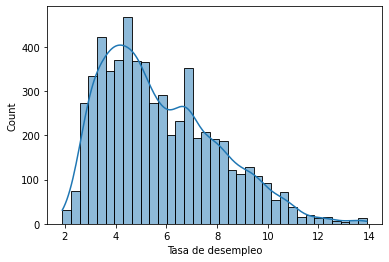

In [12]:
sns.histplot(x = 'Tasa de desempleo', data= df, kde = True)
plt.show()

https://us.as.com/us/2021/12/03/actualidad/1638569408_606361.html <br>

"Estados Unidos cambió el término de tasa natural de desempleo a “tasa de desempleo no cíclica”. En el cuarto y último trimestre de este 21, la estimación de esta tasa se encuentra en un 4.4506%. Se estima que para el primer trimestre del 2022 sea de 4.44514%."

In [13]:
print('Promedio general:', df['Tasa de desempleo'].mean() )

Promedio general: 5.75245


La tasa de desempleo anual vemos que es variable al promedio general

In [14]:
for i in df.Año.unique():
    x = df[df['Año'] == i]
    print('Promedio general del año', i,':', round(x['Tasa de desempleo'].mean(), 2))

Promedio general del año 2010 : 8.74
Promedio general del año 2011 : 8.08
Promedio general del año 2012 : 7.29
Promedio general del año 2013 : 6.71
Promedio general del año 2014 : 5.71
Promedio general del año 2015 : 4.97
Promedio general del año 2016 : 4.63
Promedio general del año 2017 : 4.12
Promedio general del año 2018 : 3.73
Promedio general del año 2019 : 3.54


Diagrama de caja de la tasa de desempleo general

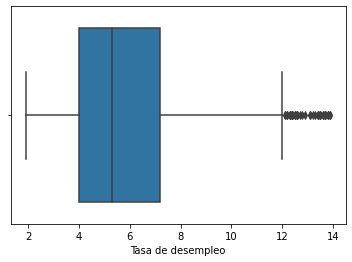

In [15]:
sns.boxplot(x = 'Tasa de desempleo', data = df)
plt.show()

In [16]:
Q1 = df['Tasa de desempleo'].quantile(0.25)
Q3 = df['Tasa de desempleo'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.0
7.2
3.2
-0.8000000000000007
12.0


In [17]:
print('Cantidad de registros totales:', df.shape[0])
print('Cantidad de outliers:', df[(df['Tasa de desempleo']<BI) | (df['Tasa de desempleo']>BS)].shape[0] )

Cantidad de registros totales: 6000
Cantidad de outliers: 49


Estados en los que tienen tasas de desempleo como outliers

In [18]:
outliers = df[(df['Tasa de desempleo']<BI) | (df['Tasa de desempleo']>BS)]

In [19]:
outliers.Estado.unique()

array(['California', 'Míchigan', 'Nevada'], dtype=object)

No hay mucha variacion entre los meses. solo una pequeña diferencia a fin de y principio de año.<br>
Otoño e invierno

<AxesSubplot:xlabel='Tasa de desempleo', ylabel='Mes'>

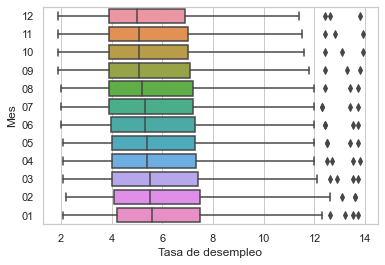

In [20]:
sns.set(style="whitegrid")

sns.boxplot(x ='Tasa de desempleo', y ='Mes', data = df )

Diagrama de caja respecto a los años

<AxesSubplot:xlabel='Tasa de desempleo', ylabel='Año'>

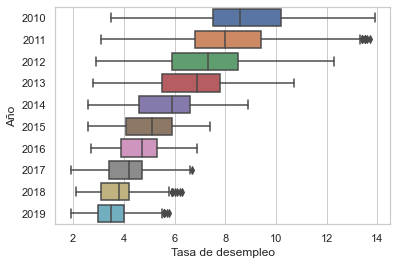

In [21]:
sns.set(style="whitegrid")

sns.boxplot(x ='Tasa de desempleo', y='Año' , data = df )

Veamos para 2011 ya que nos muestra outliers

In [22]:
para2011 = df[df['Año'] == '2011']

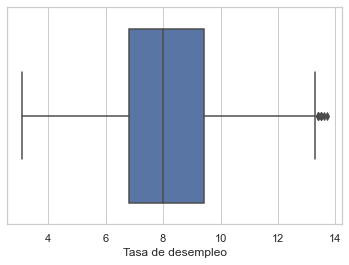

In [23]:
sns.boxplot(x = 'Tasa de desempleo', data = para2011)
plt.show()

In [24]:
Q1 = para2011['Tasa de desempleo'].quantile(0.25)
Q3 = para2011['Tasa de desempleo'].quantile(0.75)
IQR = (Q3 - Q1 )
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

6.8
9.425
2.625000000000001
2.8624999999999985
13.362500000000002


In [25]:
p2011 =  para2011[(para2011['Tasa de desempleo']<BI) | (para2011['Tasa de desempleo']>BS)]

In [26]:
p2011

,Estado,Año,Mes,Tasa de desempleo,Fecha
3856,Nevada,2011,08,13.4,2011-08
3857,Nevada,2011,07,13.4,2011-07
3858,Nevada,2011,06,13.5,2011-06
3859,Nevada,2011,05,13.4,2011-05
3860,Nevada,2011,04,13.5,2011-04
3861,Nevada,2011,03,13.5,2011-03
3862,Nevada,2011,02,13.6,2011-02
3863,Nevada,2011,01,13.7,2011-01


Vemos el caso de 2019

In [27]:
para2019 = df[df['Año'] == '2019']

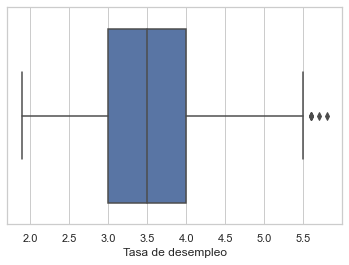

In [28]:
sns.boxplot(x = 'Tasa de desempleo', data = para2019)
plt.show()

In [29]:
Q1 = para2019['Tasa de desempleo'].quantile(0.25)
Q3 = para2019['Tasa de desempleo'].quantile(0.75)
IQR = (Q3 - Q1 )
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

3.0
4.0
1.0
1.5
5.5


In [30]:
p2019 = para2019[(para2019['Tasa de desempleo']<BI) | (para2019['Tasa de desempleo']>BS)]

In [31]:
p2019

,Estado,Año,Mes,Tasa de desempleo,Fecha
117,Alaska,2019,03,5.6,2019-03
118,Alaska,2019,02,5.7,2019-02
119,Alaska,2019,01,5.8,2019-01
2991,Misisipi,2019,09,5.6,2019-09
2992,Misisipi,2019,08,5.6,2019-08
2993,Misisipi,2019,07,5.6,2019-07


Cada año el promedio de la tasa de desempleo de todos los estados se incrementa o disminuye.<br>
Segun estudios la tasa natural de desempleo es de 4.45%.<br>
En nuestro caso el promedio por año nos da: 5.7%<br>

Finalmente de dicidimos clasificar como: <br>
- Bueno : Por debajo del 4%
- Normal : Entre el 4 y 6%
- Critico : Arriba del 6%

In [32]:
df['Clasificacion'] = np.nan

In [33]:
df['Clasificacion'].fillna(df['Tasa de desempleo'].apply(lambda x:'Bueno' if 4 >= x else np.nan), inplace=True)
df['Clasificacion'].fillna(df['Tasa de desempleo'].apply(lambda x:'Normal' if 4 < x < 6 else np.nan), inplace=True)
df['Clasificacion'].fillna(df['Tasa de desempleo'].apply(lambda x:'Critico' if 6 <= x else np.nan), inplace=True)


In [34]:
df

,Estado,Año,Mes,Tasa de desempleo,Fecha,Clasificacion
0,Alaska,2010,12,8.0,2010-12,Critico
1,Alaska,2010,11,8.1,2010-11,Critico
2,Alaska,2010,10,8.0,2010-10,Critico
3,Alaska,2010,09,8.0,2010-09,Critico
4,Alaska,2010,08,7.9,2010-08,Critico
...,...,...,...,...,...,...
5995,Wyoming,2019,05,3.4,2019-05,Bueno
5996,Wyoming,2019,04,3.3,2019-04,Bueno
5997,Wyoming,2019,03,3.4,2019-03,Bueno
5998,Wyoming,2019,02,3.5,2019-02,Bueno


In [35]:
bueno = df[df['Clasificacion'] == 'Bueno']
print(bueno.shape)
bueno.Estado.value_counts().head(10)

(1616, 6)


Dakota-del-norte    120
Nebraska             95
Dakota-del-sur       88
Utah                 75
Vermont              71
Idaho                67
Minnesota            64
Hawái                63
Nuevo-hampshire      62
Iowa                 62
Name: Estado, dtype: int64

In [36]:
bueno.Mes.value_counts().head(5)

12    153
11    146
06    141
10    138
07    138
Name: Mes, dtype: int64

In [37]:
normal = df[df['Clasificacion'] == 'Normal']
print(normal.shape)
normal.Estado.value_counts().head(10)

(1923, 6)


Wyoming            78
Oklahoma           73
Montana            69
Pensilvania        66
Washington         65
Ohio               65
Kentucky           61
Míchigan           54
Nuevo-hampshire    52
Arizona            51
Name: Estado, dtype: int64

In [38]:
normal.Mes.value_counts().head(5)

10    171
09    169
08    166
11    164
12    162
Name: Mes, dtype: int64

In [39]:
critico = df[df['Clasificacion'] == 'Critico']
print(critico.shape)
critico.Estado.value_counts().head(10)

(2461, 6)


Alaska                 100
Nuevo-méxico            91
Virginia-occidental     81
Misisipi                77
Luisiana                77
Nevada                  76
Alabama                 75
Illinois                73
Arizona                 69
California              68
Name: Estado, dtype: int64

In [40]:
df.Clasificacion.value_counts()

Critico    2461
Normal     1923
Bueno      1616
Name: Clasificacion, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estado             6000 non-null   object 
 1   Año                6000 non-null   object 
 2   Mes                6000 non-null   object 
 3   Tasa de desempleo  6000 non-null   float64
 4   Fecha              6000 non-null   object 
 5   Clasificacion      6000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 281.4+ KB


In [42]:
df

,Estado,Año,Mes,Tasa de desempleo,Fecha,Clasificacion
0,Alaska,2010,12,8.0,2010-12,Critico
1,Alaska,2010,11,8.1,2010-11,Critico
2,Alaska,2010,10,8.0,2010-10,Critico
3,Alaska,2010,09,8.0,2010-09,Critico
4,Alaska,2010,08,7.9,2010-08,Critico
...,...,...,...,...,...,...
5995,Wyoming,2019,05,3.4,2019-05,Bueno
5996,Wyoming,2019,04,3.3,2019-04,Bueno
5997,Wyoming,2019,03,3.4,2019-03,Bueno
5998,Wyoming,2019,02,3.5,2019-02,Bueno


In [43]:
df.to_csv('Calificacion_Desempleo.csv', index=False)